# genetic algorithm

In [1]:
import pickle
#from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
train='./small/session-1-DeviceGroup-1.csv'
#train='./Aalto_BIG_train_IoTDevID.csv'
vali='./small/session-2-DeviceGroup-2.csv'
test='./small/session-1-DeviceGroup-2.csv'
pickle_name="GA_input_features.pickle"
with open(pickle_name, 'rb') as handle:
    GA_input_features = pickle.load(handle)
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import pickle
import time
import random
from tqdm import tqdm
import sklearn
import numpy as np
from tabulate import tabulate


In [2]:
def makePie(name):
    df = pd.read_csv(name,usecols=["Label"])#,header=None )
    your_data = dict(df.groupby("Label").size())

    x = np.char.array(list(your_data.keys()))
    y = np.array(list(your_data.values()))
    print(your_data)
    colors = ['yellowgreen','red','gold','lightskyblue','black','lightcoral','blue','pink', 'darkgreen','yellow','grey','violet','magenta','cyan']
    porcent = 100.*y/y.sum()
    
    patches, texts = plt.pie(y,colors=colors,   startangle=90, radius=1.2)
    labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]
    
    sort_legend = True
    if sort_legend:
        patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                              key=lambda x: x[2],
                                              reverse=True))
    
    plt.legend(patches, labels, loc= 'upper right', bbox_to_anchor=(-0.1, 1.),
               fontsize=8)
    plt.savefig('piechart.png', bbox_inches='tight')
    
    plt.show()


In [3]:
file_list={"DD1":['./small/session-1-DeviceGroup-1.csv','./small/session-2-DeviceGroup-2.csv','./small/session-1-DeviceGroup-2.csv'],
"DD1T":['./small/session-2-DeviceGroup-2.csv','./small/session-1-DeviceGroup-1.csv','./small/session-2-DeviceGroup-1.csv'],
"DD2":['./small/session-2-DeviceGroup-1.csv','./small/session-1-DeviceGroup-2.csv','./small/session-2-DeviceGroup-2.csv'],
"DD2T":['./small/session-1-DeviceGroup-2.csv','./small/session-2-DeviceGroup-1.csv','./small/session-1-DeviceGroup-1.csv']}

./small/session-1-DeviceGroup-1.csv
{'AmazonAlexaEchoDot_': 2398, 'D-LinkCam1_': 8057, 'D-LinkDayCam1_': 13503, 'EdimaxCam_': 49, 'EdnetCam_': 27, 'GosundPlug_': 1925, 'GosundSocket_': 1873, 'LinkSmartPlug_': 3078, 'TeckinPlug_': 1241, 'WeMoInsightSwitch_': 449, 'WeMoSwitch_': 408, 'YutronPlug_': 1267}


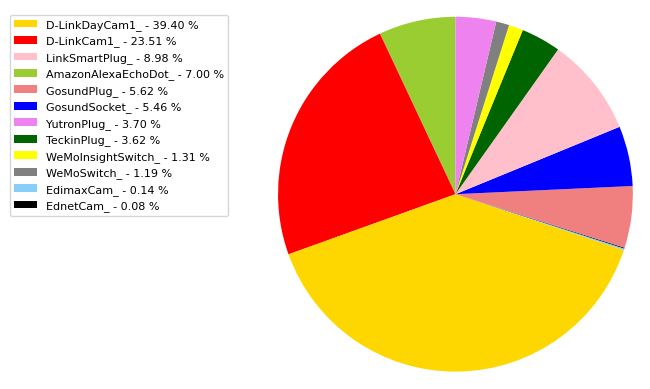

**********************************************************************************************************************************






./small/session-2-DeviceGroup-2.csv
{'AmazonAlexaEchoDot_': 1964, 'D-LinkCam2_': 45071, 'D-LinkDayCam4_': 4104, 'EdimaxCam_': 35, 'EdnetCam_': 22, 'GosundPlug_': 1931, 'GosundSocket_': 1920, 'LinkSmartPlug_': 1817, 'TeckinPlug_': 1514, 'WeMoInsightSwitch_': 149, 'WeMoSwitch_': 75, 'YutronPlug_': 1291}


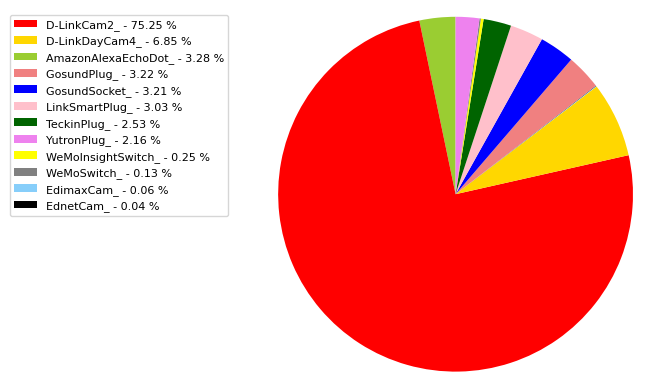

**********************************************************************************************************************************






./small/session-2-DeviceGroup-1.csv
{'AmazonAlexaEchoDot_': 2465, 'D-LinkCam1_': 17219, 'D-LinkDayCam1_': 17706, 'EdimaxCam_': 49, 'EdnetCam_': 19, 'GosundPlug_': 1968, 'GosundSocket_': 1904, 'LinkSmartPlug_': 1807, 'TeckinPlug_': 1348, 'WeMoInsightSwitch_': 483, 'WeMoSwitch_': 357, 'YutronPlug_': 1392}


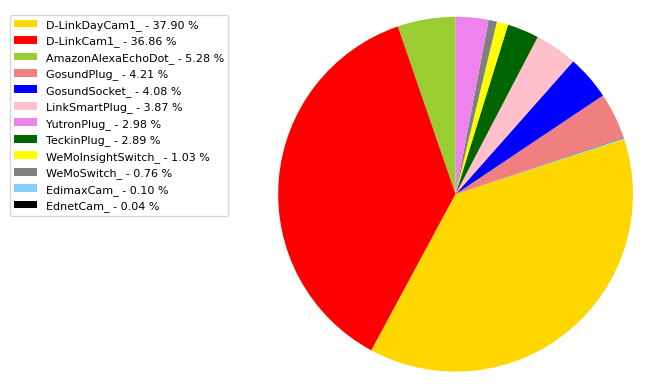

**********************************************************************************************************************************






./small/session-1-DeviceGroup-2.csv
{'AmazonAlexaEchoDot_': 2312, 'D-LinkCam2_': 21635, 'D-LinkDayCam4_': 1669, 'EdimaxCam_': 29, 'EdnetCam_': 24, 'GosundPlug_': 1893, 'GosundSocket_': 1960, 'LinkSmartPlug_': 2983, 'TeckinPlug_': 1175, 'WeMoInsightSwitch_': 184, 'WeMoSwitch_': 91, 'YutronPlug_': 1256}


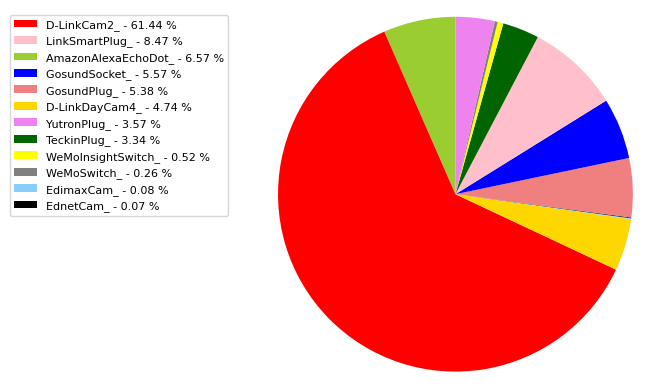

**********************************************************************************************************************************








In [4]:
for i in file_list:
    print(file_list[i][0])
    makePie(file_list[i][0])
    print("*"*130)
    print("\n"*5)

In [5]:
from  ML_initial_test import ML

fold=1
#df=ML(GA_input_features,train,vali,test,fold)

In [6]:
from  ML_initial_test import ML
#ml_list={"BaggingClassifier":BaggingClassifier()}
ml_list={"DecisionTreeClassifier":DecisionTreeClassifier()}

fold=10
df=ML(GA_input_features,train,vali,test,fold,ml_list)

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.13s/it]

    ML                        Vali-ACC    Vali-F1    Vali-STD    Test-ACC    Test-F1    Test-STD    Total-TIME
--  ----------------------  ----------  ---------  ----------  ----------  ---------  ----------  ------------
 0  DecisionTreeClassifier      0.9688     0.4935      0.0142       0.782     0.5461      0.0169         2.124


In [7]:
with open(pickle_name, 'rb') as handle:
    GA_input_features = pickle.load(handle)

In [8]:
def FeatureMaker(f):
    selected=[]
    for i,ii in enumerate(f):
        if ii:
            selected.append(GA_input_features[i])
    return selected

In [9]:
def ReadCSV(features,train,vali,test):
    df = pd.read_csv(train,usecols=features)#,header=None )
    X_train =df[df.columns[0:-1]]
    #X_train=np.array(X_train)
    df[df.columns[-1]] = df[df.columns[-1]].astype('category')
    y_train=df[df.columns[-1]].cat.codes  
    
    df = pd.read_csv(vali,usecols=features)#,header=None )
    X_vali =df[df.columns[0:-1]]
    #X_test=np.array(X_test)
    df[df.columns[-1]] = df[df.columns[-1]].astype('category')
    y_vali=df[df.columns[-1]].cat.codes  
    
    df = pd.read_csv(test,usecols=features)#,header=None )
    X_test =df[df.columns[0:-1]]
    #X_test=np.array(X_test)
    df[df.columns[-1]] = df[df.columns[-1]].astype('category')
    y_test=df[df.columns[-1]].cat.codes  
    return X_train, y_train,  X_vali, y_vali, X_test, y_test

In [10]:
model=DecisionTreeClassifier()

In [11]:
#defining various steps required for the genetic algorithm
# GA adapted from https://datascienceplus.com/genetic-algorithm-in-machine-learning-using-python/
def initilization_of_population(size,n_feat):
    population = []
    for i in range(size):
        chromosome = np.ones(n_feat,dtype=np.bool_)
        chromosome[:int(0.3*n_feat)]=False
        np.random.shuffle(chromosome)
        population.append(chromosome)
    return population

def fitness_score(population):
    scores = []
    for chromosome in population:
        model.fit(X_train.iloc[:,chromosome],y_train)
        predictions = model.predict(X_test.iloc[:,chromosome])
        scores.append(sklearn.metrics.f1_score(y_test,predictions,average= "macro"))
    scores, population = np.array(scores), np.array(population) 
    inds = np.argsort(scores)
    return list(scores[inds][::-1]), list(population[inds,:][::-1])

def selection(pop_after_fit,n_parents):
    population_nextgen = []
    for i in range(n_parents):
        population_nextgen.append(pop_after_fit[i])
    return population_nextgen

def crossover(pop_after_sel):
    population_nextgen=pop_after_sel
    for i in range(len(pop_after_sel)):
        child=pop_after_sel[i]
        child[3:7]=pop_after_sel[(i+1)%len(pop_after_sel)][3:7]
        population_nextgen.append(child)
    return population_nextgen

def mutation(pop_after_cross,mutation_rate):
    population_nextgen = []
    for i in range(0,len(pop_after_cross)):
        chromosome = pop_after_cross[i]
        for j in range(len(chromosome)):
            if random.random() < mutation_rate:
                chromosome[j]= not chromosome[j]
        population_nextgen.append(chromosome)
    #print(population_nextgen)
    return population_nextgen

def generations(size,n_feat,n_parents,mutation_rate,n_gen,X_train,
                                   X_test, y_train, y_test):
    
    best_chromo= []
    best_score= []
    population_nextgen=initilization_of_population(size,n_feat)
    for i in range(n_gen):
        second=time.time()
        scores, pop_after_fit = fitness_score(population_nextgen)
        #print(scores[:2])
        zaman=time.time()-second
        print ('%-30s %-30s %-30s' % (np.mean(scores),np.std(scores),zaman))

        pop_after_sel = selection(pop_after_fit,n_parents)
        pop_after_cross = crossover(pop_after_sel)
        population_nextgen = mutation(pop_after_cross,mutation_rate)
        best_chromo.append(pop_after_fit[0])
        best_score.append(scores[0])
    return best_chromo,best_score

In [12]:
GA_input_features=[ 'dstport',
 'dstport_class',
 'ip.flags',
 'ip.flags.df',
 'ip.id',
 'ip.len',
 'ip.proto',
 'ip.ttl',
 'ip.version',
 'Payload_Entropy',
 'srcport',
 'srcport_class',
 'tcp.ack',
 'tcp.analysis.acks_frame',
 'tcp.analysis.bytes_in_flight',
 'tcp.analysis',
 'tcp.analysis.initial_rtt',
 'tcp.analysis.push_bytes_sent',
 'tcp.checksum',
 'tcp.checksum.status',
 'tcp.completeness',
 'tcp.dstport',
 'tcp.flags.ack',
 'tcp.flags.ae',
 'tcp.flags',
 'tcp.flags.cwr',
 'tcp.flags.ece',
 'tcp.flags.fin',
 'tcp.flags.push',
 'tcp.flags.res',
 'tcp.flags.reset',
 'tcp.flags.str',
 'tcp.flags.syn',
 'tcp.flags.urg',
 'tcp.hdr_len',
 'tcp.len',
 'tcp.nxtseq',
 'tcp.options.timestamp.tsecr',
 'tcp.port',
 'tcp.seq',
 'tcp.seq_raw',
 'tcp.srcport',
 'tcp.stream',
 'tcp.time_delta',
 'tcp.time_relative',
 'tcp.urgent_pointer',
 'tcp.window_size',
 'tcp.window_size_scalefactor',
 'tcp.window_size_value',
 'tls.record.length',
 'udp.dstport',
 'udp.length',
 'udp.port',
 'udp.srcport',
 'udp.stream',
 'udp.time_delta',
 'udp.time_relative',
 '_ws.col.Protocol']

In [ ]:
final_features=[]

for i in file_list:
    features=GA_input_features
    train=file_list[i][0]
    vali=file_list[i][1]
    test=file_list[i][2]
    X_train, y_train, X_test, y_test, X_final, y_final=ReadCSV(features,train,vali,test)
    fold=10
    print("Before GA")
    df=ML(GA_input_features,train,vali,test,fold,ml_list)
    
    print ('\n\n%-30s %-30s %-30s' % ("MEAN","STD","TIME"))
    chromo,score=generations(size=200,n_feat=X_train.shape[1],n_parents=120,mutation_rate=0.05,
                         n_gen=25,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)
    print("\n\nAfter GA")
    selected=FeatureMaker(chromo[-1])
    df=ML(selected,train,vali,test,fold,ml_list)
    print("\n","*"*140,"\n\n\n\n\n")
    final_features.append(selected)

Before GA


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.96s/it]


    ML                        Vali-ACC    Vali-F1    Vali-STD    Test-ACC    Test-F1    Test-STD    Total-TIME
--  ----------------------  ----------  ---------  ----------  ----------  ---------  ----------  ------------
 0  DecisionTreeClassifier      0.9712     0.5004      0.0205       0.782     0.5361      0.0389        1.9637


MEAN                           STD                            TIME                          
0.4925557798223009             0.02369267512307658            27.31954002380371             
0.49331693643501934            0.01533398178336197            31.06771683692932             
0.49285772548796286            0.02313154413021937            30.16701650619507             
0.49244191221117134            0.019649599602275577           29.69013810157776             
0.49322512635760885            0.023388988701343115           28.604762315750122            
0.4911915309460887             0.025602437938518324           28.309857606887817            
0.491429182312

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.56s/it]


    ML                        Vali-ACC    Vali-F1    Vali-STD    Test-ACC    Test-F1    Test-STD    Total-TIME
--  ----------------------  ----------  ---------  ----------  ----------  ---------  ----------  ------------
 0  DecisionTreeClassifier      0.9664     0.4878      0.0033      0.7821     0.5556           0        1.5554

 ******************************************************************************************************************************************** 





Before GA


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  4.00s/it]


    ML                        Vali-ACC    Vali-F1    Vali-STD    Test-ACC    Test-F1    Test-STD    Total-TIME
--  ----------------------  ----------  ---------  ----------  ----------  ---------  ----------  ------------
 0  DecisionTreeClassifier      0.9898     0.5067      0.0108      0.5245      0.221      0.0013        3.9976


MEAN                           STD                            TIME                          
0.5059132443883009             0.021777972191038372           57.58475136756897             
0.5068885580837955             0.011488310884705292           65.49570202827454             
0.5044479079933955             0.024331489765523066           63.10373878479004             
0.5071061104048233             0.01566107676677211            71.6691644191742              
0.5079897683606168             0.0195063297451669             76.25223159790039             
0.50516140931172               0.025689249057658424           81.44561815261841             
0.506077742768

In [ ]:
for i in final_features:
    print(len(i))

In [ ]:
# Listeleri tanımla
liste1 = final_features[0]
liste2 = final_features[1]
liste3 = final_features[2]
liste4 = final_features[3]

# Listeleri kümeye çevir
kume1 = set(liste1)
kume2 = set(liste2)
kume3 = set(liste3)
kume4 = set(liste4)

# Kümelerin kesişimini bul
kesisim = kume1.intersection(kume2, kume3, kume4)

# Kesişim elemanlarını yazdır
print("Kesişim:", kesisim)

In [ ]:
len(kesisim)